In [1]:
import requests
import random
import string
import matplotlib.pyplot as plt

In [2]:
k = 4
weights = [26**(i + 1) for i in range(k)]
M = sum(weights)

def randomStringList(n):
    # geramos aleatoriamente n números entre 1 e 4 nas proporções 1: 26, 2: 26**2, 3: 26**3, 4: 26**4,
    # ou aproximadamente 1: 0,005%, 2: 0,14%, 3: 3,7%, 4: 96,15%
    listOfNumbers = random.choices(range(1, k + 1), weights=weights, k=n)
    randomCharacters = []
    randomStrings = []

    for i in range(len(listOfNumbers)):
        # geramos k caracteres uniformemente, onde k é dado pela lista listOfNumbers
        randomCharacters.append(random.choices(string.ascii_lowercase, k=listOfNumbers[i]))

    for i in range(len(randomCharacters)):
        # juntamos os caracteres em strings
        URLstring = ''.join(randomCharacters[i])
        randomStrings.append(URLstring)
    return randomStrings

In [3]:
yScale = []
N = 100000
randomStrings = randomStringList(N)

returnCodes = []
existingURLs = []
count = 0
errorCount = 0

for n in range(N):
    try:
        URL = 'http://www.' + randomStrings[n] + '.ufrj.br'
        status = requests.head(URL)
        returnCodes.append(status.status_code)
        existingURLs.append(URL)
        if status.status_code < 400:
            count += 1
    except requests.ConnectionError:
        errorCount += 1
        
    yScale.append(M * count / (n + 1))

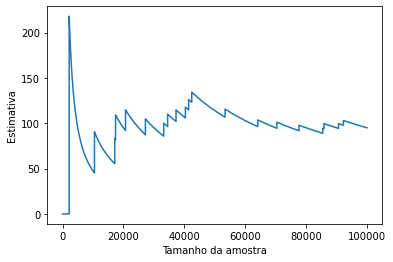

In [57]:
plt.plot(range(1, N + 1), yScale)
plt.xlabel('Tamanho da amostra')
plt.ylabel('Estimativa')
plt.show()